# Scikit learn for cross-validating OLS
## Dream Team - ORIE 4741 Project

In [1]:
using CSV, Plots, DataFrames, Statistics, LinearAlgebra, PyCall, Random

In [2]:
include("../plot_pred.jl")

plot_pred_true (generic function with 2 methods)

## Import data

In [3]:
train_df = CSV.read("train_impute.csv", DataFrame);
train = Matrix(train_df);
Xtrain = train[:, 1:(end-3)];

# train_std = train[:, 190];
# train_ppr = train[:, 191];
# train_half = train[:, 192];

train_std = train[:, end-2];
train_ppr = train[:, end-1];
train_half = train[:, end];

test_df = CSV.read("test_impute.csv", DataFrame);
test = Matrix(test_df);
Xtest = test[:, 1:(end-3)];

# test_std = test[:, 190];
# test_ppr = test[:, 191];
# test_half = test[:, 192];

test_std = test[:, end-2];
test_ppr = test[:, end - 1];
test_half = test[:, end];

In [4]:
lm = pyimport("sklearn.linear_model")
ms = pyimport("sklearn.model_selection")
metrics = pyimport("sklearn.metrics")
lr = lm.LinearRegression()

PyObject LinearRegression()

In [5]:
Xtrain

41270×37 Array{Float64,2}:
   0.0    0.0      0.0        0.0     …  1785.39  1.0  0.0  0.0  0.0  0.0
   0.0    0.0      0.0        0.0        1448.62  1.0  0.0  0.0  0.0  0.0
   0.0    0.0      0.0        0.0        1634.88  0.0  1.0  0.0  0.0  0.0
   0.0    0.0      0.0        0.0        1641.18  1.0  0.0  0.0  0.0  0.0
 251.75   1.25     0.5       31.5        1571.11  0.0  0.0  1.0  0.0  0.0
   0.0    0.0      0.0        0.0     …  1564.85  0.0  0.0  0.0  1.0  0.0
   0.0    0.0      0.0        0.0        1414.69  0.0  1.0  0.0  0.0  0.0
   0.0    0.0      0.0        0.0        1566.56  1.0  0.0  0.0  0.0  0.0
   0.0    0.0      0.0        0.0        1446.94  0.0  1.0  0.0  0.0  0.0
   0.0    0.0      0.0        0.0        1606.97  0.0  0.0  0.0  1.0  0.0
   0.0    0.0      0.0        0.0     …  1516.61  0.0  0.0  0.0  1.0  0.0
   0.0    0.0      0.0        0.0        1468.45  0.0  1.0  0.0  0.0  0.0
   0.0    0.0      0.0        0.0        1404.48  1.0  0.0  0.0  0.0  0.0
   ⋮       

Call Python sklearn from Julia.

In [6]:
Random.seed!(0)
lm_cv = ms.cross_validate(lr, Xtrain, train_std, scoring = "neg_mean_squared_error", cv = 10, return_estimator = true)

Dict{Any,Any} with 4 entries:
  "fit_time"   => [0.140624, 0.10472, 0.103755, 0.127627, 0.118685, 0.0897257, …
  "score_time" => [0.000997066, 0.000991106, 0.000966072, 0.000997543, 0.002998…
  "estimator"  => (PyObject LinearRegression(), PyObject LinearRegression(), Py…
  "test_score" => [-32.489, -33.4447, -30.6551, -32.3496, -32.1886, -32.6971, -…

In [7]:
lm_cv["test_score"]

10-element Array{Float64,1}:
 -32.48903940644395
 -33.444702012130804
 -30.655137815687336
 -32.34958877212117
 -32.18862509264966
 -32.697053066136334
 -32.48280869931185
 -32.45319652508109
 -30.64337513384208
 -31.89309945579156

In [8]:
lm_coef = sum([(lm_cv["estimator"][i].coef_) for i in 1:10])/10

37-element Array{Float64,1}:
  0.018260319473504268
  1.0415303799704172
 -0.2409233491819905
 -0.17801626878676818
  0.36905625826898153
  0.14187764695132254
  0.04497376527032002
  1.190615709738795
 -0.2644455575855381
  0.4896070776212717
  0.04595120815275562
  0.7105421038298091
 -0.18965342404658042
  ⋮
 -0.0014322907465838268
  0.1817182303826249
 -0.18893322513885957
 -0.008956344221275322
 -0.009785038339799313
  0.0029213546570789907
 -0.0021374835782683927
 -0.997364453616649
 -0.5619865927142211
  3.0395955828628125
 -0.9861250233098083
 -0.4941195132221353

In [9]:
"""This function computes the mean squared error."""
function MSE(y, pred)
    error = (y.-pred).^2
    mse = sum(error[:, 1])/size(error, 1)
    return mse
end

MSE

In [10]:
test_pred = sum(lm_coef'.*Xtest, dims = 2)
MSE(test_std, test_pred)

35.45517779048689

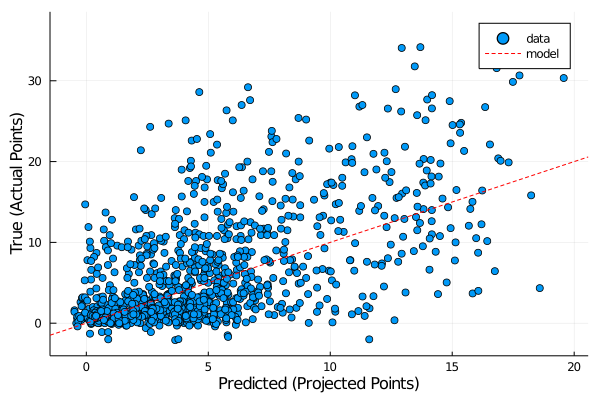

In [11]:
plot_pred_true(test_pred, test_std)

In [12]:
lm_cv_ppr = ms.cross_validate(lr, Xtrain, train_ppr, scoring = "neg_mean_squared_error", cv = 10, return_estimator = true)
lm_cv_ppr["test_score"]

10-element Array{Float64,1}:
 -44.09221972108715
 -44.72275990898606
 -42.98156029847481
 -43.816552527616246
 -43.80882450206708
 -43.82837104421184
 -43.94204559268727
 -44.45423771820517
 -42.524985260680715
 -44.167435466044616

In [13]:
# lm_cv_ppr_coef = lm_cv_ppr["estimator"][6].coef_;
lm_cv_ppr_coef = sum([(lm_cv_ppr["estimator"][i].coef_) for i in 1:10])/10

37-element Array{Float64,1}:
  0.01966506707086212
  0.8870738028345583
 -0.2617889714443665
 -0.16318207541835264
  0.3669710185377644
  0.1105269540622826
  0.05235408001226609
  1.1580164942825122
  0.014102825232214311
  0.6483534837401482
  0.05123544120039982
  0.7857347216652701
 -0.2691039189117806
  ⋮
 -0.0025670014909976195
  0.2585068413309636
 -0.2911186355218852
 -0.009666227628255395
 -0.012669559689929773
  0.0031625342511910244
 -0.002116306792296868
 -0.8485952194928046
  0.22223091213577612
  2.0007522813127183
 -0.3069436240048572
 -1.0674443499508335

In [14]:
lm_cv_half = ms.cross_validate(lr, Xtrain, train_half, scoring = "neg_mean_squared_error", cv = 10, return_estimator = true)
lm_cv_half["test_score"]

10-element Array{Float64,1}:
 -37.52690947841048
 -38.343678981368875
 -36.03386448144062
 -37.354169270664585
 -37.22866498532321
 -37.530732658336824
 -37.45341663507378
 -37.69436785960401
 -35.8072343525384
 -37.24315018410401

In [15]:
# lm_cv_half_coef = lm_cv_half["estimator"][6].coef_;
lm_cv_half_coef = sum([(lm_cv_half["estimator"][i].coef_) for i in 1:10])/10

37-element Array{Float64,1}:
  0.018962693272183175
  0.9643020914024903
 -0.2513561603131783
 -0.17059917210256037
  0.3680136384033729
  0.12620230050680264
  0.048663922641293045
  1.1743161020106534
 -0.12517136617666189
  0.5689802806807099
  0.04859332467657776
  0.7481384127475397
 -0.22937867147918026
  ⋮
 -0.001999646118790731
  0.22011253585679444
 -0.24002593033037273
 -0.009311285924765395
 -0.01122729901486454
  0.003041944454134988
 -0.002126895185282653
 -0.9229798365547268
 -0.16987784028922254
  2.5201739320877645
 -0.6465343236573325
 -0.7807819315864843

In [16]:
test_pred_ppr = sum(lm_cv_ppr_coef'.*Xtest, dims = 2)
test_pred_half = sum(lm_cv_half_coef'.*Xtest, dims = 2);

In [17]:
@show MSE(test_ppr, test_pred_ppr)
@show MSE(test_half, test_pred_half)
@show metrics.r2_score(test_std, test_pred)
@show metrics.r2_score(test_ppr, test_pred_ppr)
@show metrics.r2_score(test_half, test_pred_half)

MSE(test_ppr, test_pred_ppr) = 49.00880755725839
MSE(test_half, test_pred_half) = 41.434010114793736
metrics.r2_score(test_std, test_pred) = 0.2680253910521284
metrics.r2_score(test_ppr, test_pred_ppr) = 0.21821606712248387
metrics.r2_score(test_half, test_pred_half) = 0.23573886997342752


0.23573886997342752

## Export

In [21]:
test_pred_all = CSV.read("test_pred_impute.csv", DataFrame)
test_pred_all.std_ols = vec(test_pred)
test_pred_all.ppr_ols = vec(test_pred_ppr)
test_pred_all.half_ols = vec(test_pred_half);
# CSV.write("$(pwd())\\test_pred_impute.csv", test_pred_all)

"C:\\Users\\darre\\Documents\\_cornell 20-21\\orie 4741\\dream-team\\base models\\test_pred_impute.csv"

In [93]:
test_pred_all

,std_lasso,ppr_lasso,half_lasso,std_ols,ppr_ols,half_ols,std_q
,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,8.34245,12.4353,10.4163,5.21642,6.63402,5.21642,5.83232
2,6.21273,9.55399,7.8866,2.70902,3.75263,2.70902,3.15853
3,4.68612,7.50545,6.07766,0.950323,1.72668,0.950323,1.40242
4,5.9337,9.4833,7.72491,2.47799,3.57046,2.47799,3.64539
5,4.18057,6.48689,5.33634,0.194448,0.735826,0.194448,1.99003
6,5.34338,8.22768,6.76977,1.70667,2.55822,1.70667,2.30717
7,4.78523,7.46443,6.10004,0.994758,1.72031,0.994758,3.03987
8,4.40215,7.05279,5.73486,0.541589,1.23197,0.541589,2.09788
9,4.22617,6.29751,5.25614,0.133929,0.568555,0.133929,0.00513357


## Plot

In [22]:
function plotDiagonal_2(xmin, xmax)
    xsamples = [xmin, xmax]
    plot!(xsamples, xsamples, color = :black, linestyle = :dash, label = "True Model", linealpha = 0.7, lw = 2)
end

plotDiagonal_2 (generic function with 1 method)

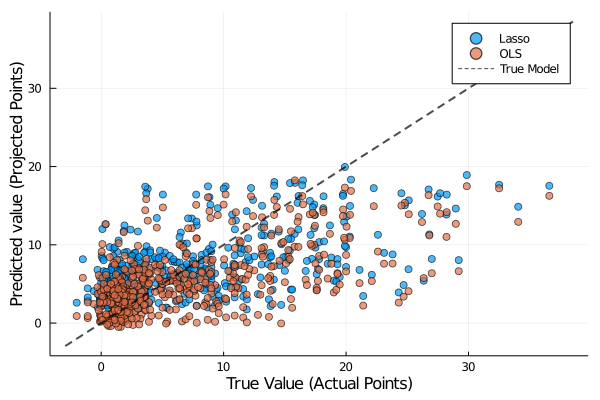

In [23]:
scatter(test_std[1:500], test_pred_all[1:500, :std_lasso], label = "Lasso", seriesalpha = 0.7)
scatter!(test_std[1:500], test_pred_all[1:500, :std_ols], label = "OLS", seriesalpha = 0.7)
# scatter!(test_std[1:500], test_pred_all[1:500, :std_q], label = "Quantile (0.4)", seriesalpha = 0.7)
# plot!(test_std[1:500], test_std[1:500], label = "True model", linestyle = :dash, seriesalpha = 0.4, color = :red)
plotDiagonal_2(minimum(test_std[1:500]) .- 0.05*(maximum(test_pred_all[1:500, :std_ols]) .- minimum(test_pred_all[1:500, :std_ols])), maximum(test_std[1:500]) .+ 0.05*(maximum(test_std[1:500] .- minimum(test_std[1:500]))))
xlabel!("True Value (Actual Points)")
ylabel!("Predicted value (Projected Points)")
# savefig("scatter.png")

In [24]:
# savefig("scatter.png")

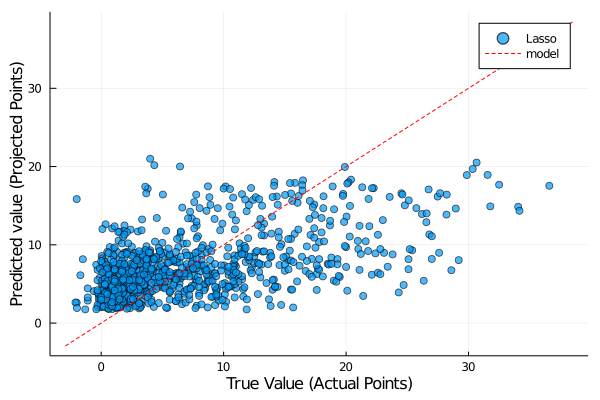

In [25]:
scatter(test_std[1:1000], test_pred_all[1:1000, :std_lasso], label = "Lasso", seriesalpha = 0.7)
plotDiagonal(minimum(test_std[1:500]) .- 0.05*(maximum(test_pred_all[1:500, :std_ols]) .- minimum(test_pred_all[1:500, :std_ols])), maximum(test_std[1:500]) .+ 0.05*(maximum(test_std[1:500] .- minimum(test_std[1:500]))))
xlabel!("True Value (Actual Points)")
ylabel!("Predicted value (Projected Points)")
# savefig("lasso_v2.png")

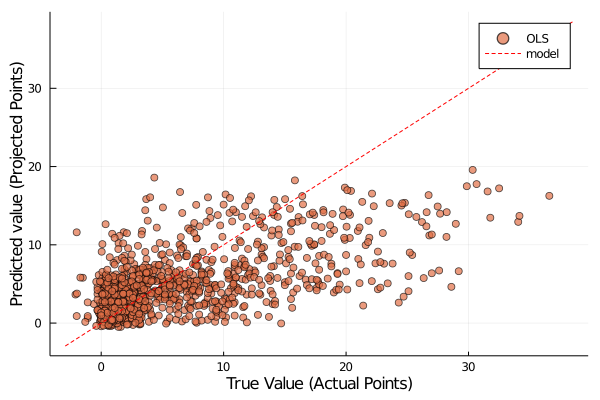

In [26]:
scatter(test_std[1:1000], test_pred_all[1:1000, :std_ols], label = "OLS", seriesalpha = 0.7, color = palette(:default)[2])
plotDiagonal(minimum(test_std[1:500]) .- 0.05*(maximum(test_pred_all[1:500, :std_ols]) .- minimum(test_pred_all[1:500, :std_ols])), maximum(test_std[1:500]) .+ 0.05*(maximum(test_std[1:500] .- minimum(test_std[1:500]))))
xlabel!("True Value (Actual Points)")
ylabel!("Predicted value (Projected Points)")
# savefig("ols_v2.png")

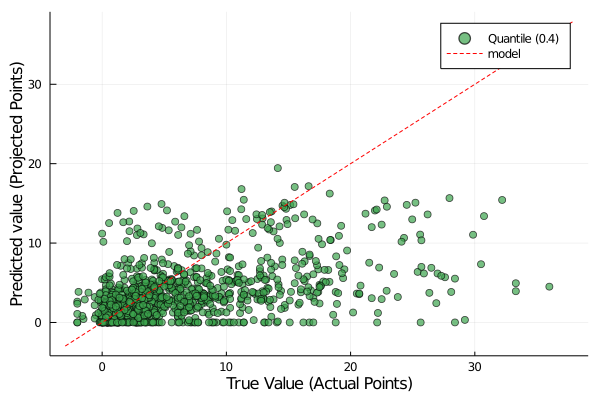

In [102]:
scatter(test_std[1:1000], test_pred_all[1:1000, :std_q], label = "Quantile (0.4)", seriesalpha = 0.7, color = palette(:default)[3])
plotDiagonal(minimum(test_std[1:500]) .- 0.05*(maximum(test_pred_all[1:500, :std_ols]) .- minimum(test_pred_all[1:500, :std_ols])), maximum(test_std[1:500]) .+ 0.05*(maximum(test_std[1:500] .- minimum(test_std[1:500]))))
xlabel!("True Value (Actual Points)")
ylabel!("Predicted value (Projected Points)")
# savefig("quantile_40.png")

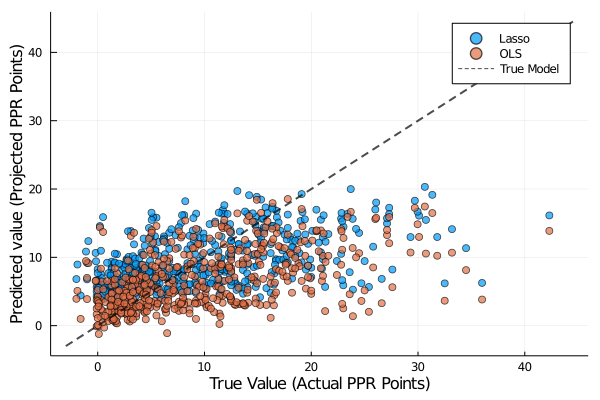

In [147]:
scatter(test_ppr[1:500], test_pred_all[1:500, :ppr_lasso], label = "Lasso", seriesalpha = 0.7)
scatter!(test_ppr[1:500], test_pred_all[1:500, :ppr_ols], label = "OLS", seriesalpha = 0.7)
# scatter!(test_ppr[1:500], test_pred_all[1:500, :ppr_q], label = "Quantile (0.4)", seriesalpha = 0.7)
# plot!(test_std[1:500], test_std[1:500], label = "True model", linestyle = :dash, seriesalpha = 0.4, color = :red)
plotDiagonal_2(minimum(test_ppr[1:500]) .- 0.05*(maximum(test_pred_all[1:500, :ppr_ols]) .- minimum(test_pred_all[1:500, :ppr_ols])), maximum(test_ppr[1:500]) .+ 0.05*(maximum(test_ppr[1:500] .- minimum(test_ppr[1:500]))))
xlabel!("True Value (Actual PPR Points)")
ylabel!("Predicted value (Projected PPR Points)")
# savefig("ppr_model_comparison.png")

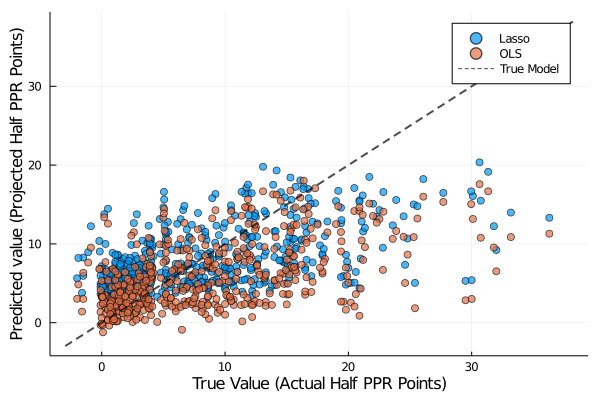

In [149]:
scatter(test_half[1:500], test_pred_all[1:500, :half_lasso], label = "Lasso", seriesalpha = 0.7)
scatter!(test_half[1:500], test_pred_all[1:500, :half_ols], label = "OLS", seriesalpha = 0.7)
# scatter!(test_half[1:500], test_pred_all[1:500, :half_q], label = "Quantile (0.4)", seriesalpha = 0.7)
# plot!(test_std[1:500], test_std[1:500], label = "True model", linestyle = :dash, seriesalpha = 0.4, color = :red)
plotDiagonal_2(minimum(test_half[1:500]) .- 0.05*(maximum(test_pred_all[1:500, :half_ols]) .- minimum(test_pred_all[1:500, :half_ols])), maximum(test_half[1:500]) .+ 0.05*(maximum(test_half[1:500] .- minimum(test_half[1:500]))))
xlabel!("True Value (Actual Half PPR Points)")
ylabel!("Predicted value (Projected Half PPR Points)")
# savefig("half_model_comparison.png")

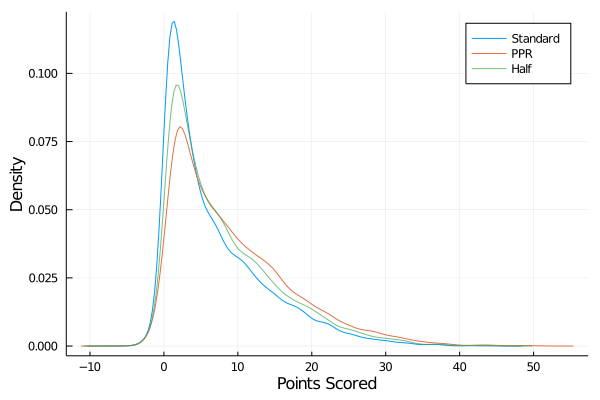

In [107]:
using StatsPlots
density(test_std, label = "Standard")
density!(test_ppr, label = "PPR")
density!(test_half, seriesalpha = 0.7, label = "Half")
xlabel!("Points Scored")
ylabel!("Density")
# savefig("points_density.png")

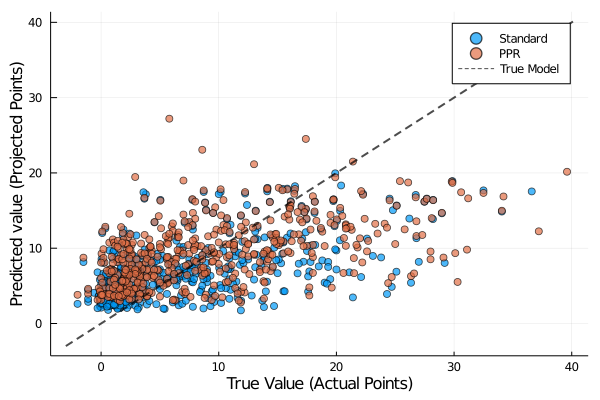

In [27]:
scatter(test_std[1:500], test_pred_all[1:500, :std_lasso], label = "Standard", seriesalpha = 0.7)
scatter!(test_ppr[1:500], test_pred_all[1:500, :ppr_lasso], label = "PPR", seriesalpha = 0.7)
# scatter!(test_half[1:500], test_pred_all[1:500, :half_lasso], label = "Half", seriesalpha = 0.7)
# plot!(test_std[1:500], test_std[1:500], label = "True model", linestyle = :dash, seriesalpha = 0.4, color = :red)
plotDiagonal_2(minimum(test_half[1:500]) .- 0.05*(maximum(test_pred_all[1:500, :half_lasso]) .- minimum(test_pred_all[1:500, :half_lasso])), maximum(test_half[1:500]) .+ 0.05*(maximum(test_half[1:500] .- minimum(test_half[1:500]))))
xlabel!("True Value (Actual Points)")
ylabel!("Predicted value (Projected Points)")
# savefig("lass_point_comparison.png")

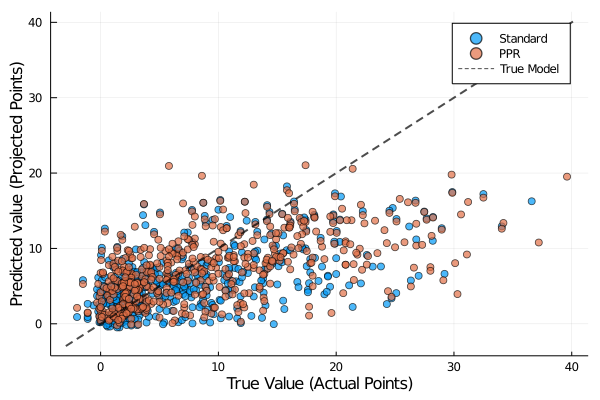

In [28]:
scatter(test_std[1:500], test_pred_all[1:500, :std_ols], label = "Standard", seriesalpha = 0.7)
scatter!(test_ppr[1:500], test_pred_all[1:500, :ppr_ols], label = "PPR", seriesalpha = 0.7)
# scatter!(test_half[1:500], test_pred_all[1:500, :half_ols], label = "Half", seriesalpha = 0.7)
# plot!(test_std[1:500], test_std[1:500], label = "True model", linestyle = :dash, seriesalpha = 0.4, color = :red)
plotDiagonal_2(minimum(test_half[1:500]) .- 0.05*(maximum(test_pred_all[1:500, :half_ols]) .- minimum(test_pred_all[1:500, :half_ols])), maximum(test_half[1:500]) .+ 0.05*(maximum(test_half[1:500] .- minimum(test_half[1:500]))))
xlabel!("True Value (Actual Points)")
ylabel!("Predicted value (Projected Points)")

In [153]:
scatter(test_std[1:500], test_pred_all[1:500, :std_q], label = "Standard", seriesalpha = 0.7)
scatter!(test_ppr[1:500], test_pred_all[1:500, :ppr_q], label = "PPR", seriesalpha = 0.7)
scatter!(test_half[1:500], test_pred_all[1:500, :half_q], label = "Half", seriesalpha = 0.7)
# plot!(test_std[1:500], test_std[1:500], label = "True model", linestyle = :dash, seriesalpha = 0.4, color = :red)
plotDiagonal_2(minimum(test_half[1:500]) .- 0.05*(maximum(test_pred_all[1:500, :half_q]) .- minimum(test_pred_all[1:500, :half_q])), maximum(test_half[1:500]) .+ 0.05*(maximum(test_half[1:500] .- minimum(test_half[1:500]))))
xlabel!("True Value (Actual Points)")
ylabel!("Predicted value (Projected Points)")

LoadError: ArgumentError: column name :std_q not found in the data frame